# Acessing precipitation data from december 2025

In [ ]:
##USE THIS TO IDENTIFY WHICH STATIONS HAVE PRECIPITATION DATA IN WASHINGTON
#Can change dataypeid to a different data type as well. 
# See https://www.ncei.noaa.gov/cdo-web/webservices/v2#gettingStarted for further information about categories or data types

import requests
import json
import pandas as pd

token = "BgisjyvDOKLEcfeFOtxYWAcFzQRGfSoI"
headers = {"token": token}

url = "https://www.ncei.noaa.gov/cdo-web/api/v2/stations"
params = {
    "datasetid": "GHCND",  # or PRECIP_HRLY
    "datatypeid": "PRCP",
    "extent": "47.0,-121.5,48.5,-120.0",  # bounding box for North Cascades
    "limit": 1000
}

r = requests.get(url, headers=headers, params=params)
r.raise_for_status()

stations = r.json().get("results", [])
print(json.dumps(stations, indent=2))


[
  {
    "elevation": 227.4,
    "mindate": "2008-09-26",
    "maxdate": "2025-12-31",
    "latitude": 47.370919,
    "name": "MALAGA 0.4 WSW, WA US",
    "datacoverage": 0.9328,
    "id": "GHCND:US1WACH0004",
    "elevationUnit": "METERS",
    "longitude": -120.207422
  },
  {
    "elevation": 242.6,
    "mindate": "2008-09-27",
    "maxdate": "2016-11-02",
    "latitude": 47.420111,
    "name": "WENATCHEE 0.4 S, WA US",
    "datacoverage": 0.7029,
    "id": "GHCND:US1WACH0007",
    "elevationUnit": "METERS",
    "longitude": -120.326023
  },
  {
    "elevation": 477.3,
    "mindate": "2008-08-01",
    "maxdate": "2020-04-19",
    "latitude": 47.492112,
    "name": "PESHASTIN 5.3 SSW, WA US",
    "datacoverage": 0.9159,
    "id": "GHCND:US1WACH0008",
    "elevationUnit": "METERS",
    "longitude": -120.633688
  },
  {
    "elevation": 392.9,
    "mindate": "2008-09-19",
    "maxdate": "2013-05-23",
    "latitude": 47.408587,
    "name": "WENATCHEE 2.7 WSW, WA US",
    "datacoverage":

In [61]:
## METHOD USING PARAMETERS
# Once we've picked a station out, this is where we put in a request for the data within a timeframe. 
# For now, I chose to use GHCND:USC00458059 STEHEKIN 4 NW, WA US

import requests
import pandas as pd

# Token received for the email fnovak@uw.edu:
token = "BgisjyvDOKLEcfeFOtxYWAcFzQRGfSoI"

url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
params = {
    "datasetid": "GHCND",
    "datatypeid": "PRCP",
    "stationid": "GHCND:USC00458059",
    "startdate": "2025-11-01",
    "enddate": "2025-12-31",
    "units": "metric",
    "limit": 1000
}

headers = {"token": token}

r = requests.get(url, headers=headers, params=params)
r.raise_for_status()

json_data = r.json()

results = json_data.get("results", [])
if not json_data:
    raise ValueError("NOAA returned an empty response ({}). Likely no matching data.")

if len(results) == 0:
    print("No precipitation data for this station/date range.")
    print("Full response:", json_data)
else:
    df = pd.DataFrame(results)
    df["precip_mm"] = df["value"] / 10
    print(df.head())

                  date datatype            station attributes  value  \
0  2025-11-01T00:00:00     PRCP  GHCND:USC00458059   ,,H,0800   30.5   
1  2025-11-02T00:00:00     PRCP  GHCND:USC00458059   ,,H,0800   18.8   
2  2025-11-03T00:00:00     PRCP  GHCND:USC00458059   ,,H,0800    0.5   
3  2025-11-04T00:00:00     PRCP  GHCND:USC00458059   ,,H,0800    1.3   
4  2025-11-05T00:00:00     PRCP  GHCND:USC00458059   ,,H,0800   15.7   

   precip_mm  
0       3.05  
1       1.88  
2       0.05  
3       0.13  
4       1.57  


In [ ]:
##ACTUAL API SEARCH BASED ON AKSHAY'S EXAMPLE
import json
import requests
import pandas as pd
# From NOAA's NCEI services
url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&stationid=GHCND:USC00458059&units=metric&startdate=2025-11-01&enddate=2025-12-31&limit=1000"

token = "BgisjyvDOKLEcfeFOtxYWAcFzQRGfSoI"
headers = {"token": token}
response = requests.get(url, headers=headers)
response.raise_for_status()

json_data = response.json()
print(json.dumps(json_data, indent=2))

# Convert to DataFrame
df = pd.DataFrame(results)

# May need to convert units since apparently NOAA stores in tenths of mm?
df["precip_mm"] = df["value"] / 10

df = df[["date", "station", "precip_mm"]]

# Save to CSV
df.to_csv("stehekin_prcp_2025.csv", index=False)

print("Saved stehekin_prcp_2025.csv")
print(df.head())

{
  "metadata": {
    "resultset": {
      "offset": 1,
      "count": 56,
      "limit": 1000
    }
  },
  "results": [
    {
      "date": "2025-11-01T00:00:00",
      "datatype": "PRCP",
      "station": "GHCND:USC00458059",
      "attributes": ",,H,0800",
      "value": 30.5
    },
    {
      "date": "2025-11-02T00:00:00",
      "datatype": "PRCP",
      "station": "GHCND:USC00458059",
      "attributes": ",,H,0800",
      "value": 18.8
    },
    {
      "date": "2025-11-03T00:00:00",
      "datatype": "PRCP",
      "station": "GHCND:USC00458059",
      "attributes": ",,H,0800",
      "value": 0.5
    },
    {
      "date": "2025-11-04T00:00:00",
      "datatype": "PRCP",
      "station": "GHCND:USC00458059",
      "attributes": ",,H,0800",
      "value": 1.3
    },
    {
      "date": "2025-11-05T00:00:00",
      "datatype": "PRCP",
      "station": "GHCND:USC00458059",
      "attributes": ",,H,0800",
      "value": 15.7
    },
    {
      "date": "2025-11-06T00:00:00",
      "d

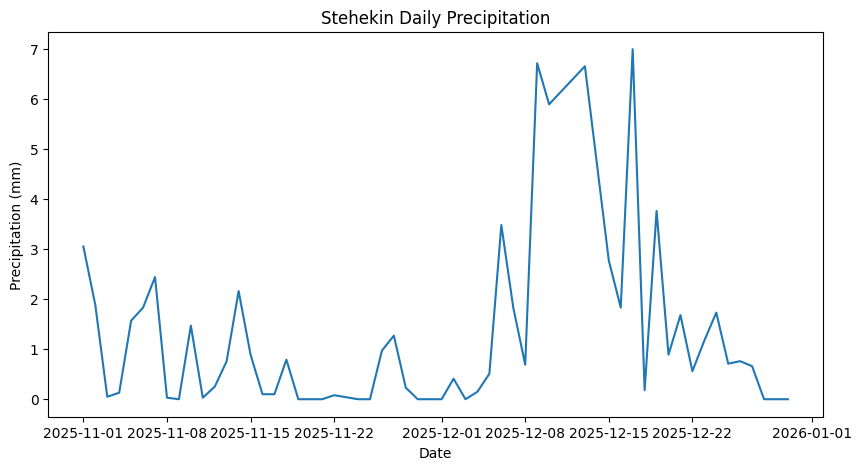

In [ ]:
##PLOT JUST TO MAKE SURE THE DATA ARE CORRECT
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["date"])

plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["precip_mm"])
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")
plt.title("Stehekin Daily Precipitation")
plt.show()